# 🏦 CREDIT RISK PREDICTION NOTEBOOK


### 1. Import requried libraries

In [88]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")



### 2. Read and Explain Dataset

In [89]:
#Read data

# from google.colab import drive
# drive.mount("/content/drive")

# # refere file from Python Zero location
# data_original =  pd.read_csv('/content/drive/MyDrive/Python Zero/credit_risk_dataset.csv')
# data = pd.read_csv('/content/drive/MyDrive/Python Zero/credit_risk_dataset.csv')

#Read data
data_original =  pd.read_csv("credit_risk_dataset.csv") 
data = pd.read_csv("credit_risk_dataset.csv") 


# Print sample
data.sample(6).reset_index(drop=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,66912,MORTGAGE,7.0,PERSONAL,C,16000,12.73,0,0.24,N,3
1,24,112000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,20000,6.91,0,0.18,N,4
2,26,88900,OWN,2.0,PERSONAL,B,5000,11.83,0,0.06,N,4
3,27,91800,MORTGAGE,5.0,MEDICAL,D,25000,15.95,1,0.23,N,9
4,23,112404,MORTGAGE,1.0,DEBTCONSOLIDATION,C,6000,13.23,0,0.05,Y,2
5,52,54833,RENT,14.0,HOMEIMPROVEMENT,A,20000,7.49,1,0.36,N,25


### Feature Descriptions


<div style="background-color: #0c0c0cff; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> The percentage of income represented by the loan amount.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


### 3. Exploratory Data Analysis

In [90]:
data.shape

(32581, 12)

In [91]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [92]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [93]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [95]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [96]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [97]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [98]:
data.duplicated().sum()

np.int64(165)

In [99]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


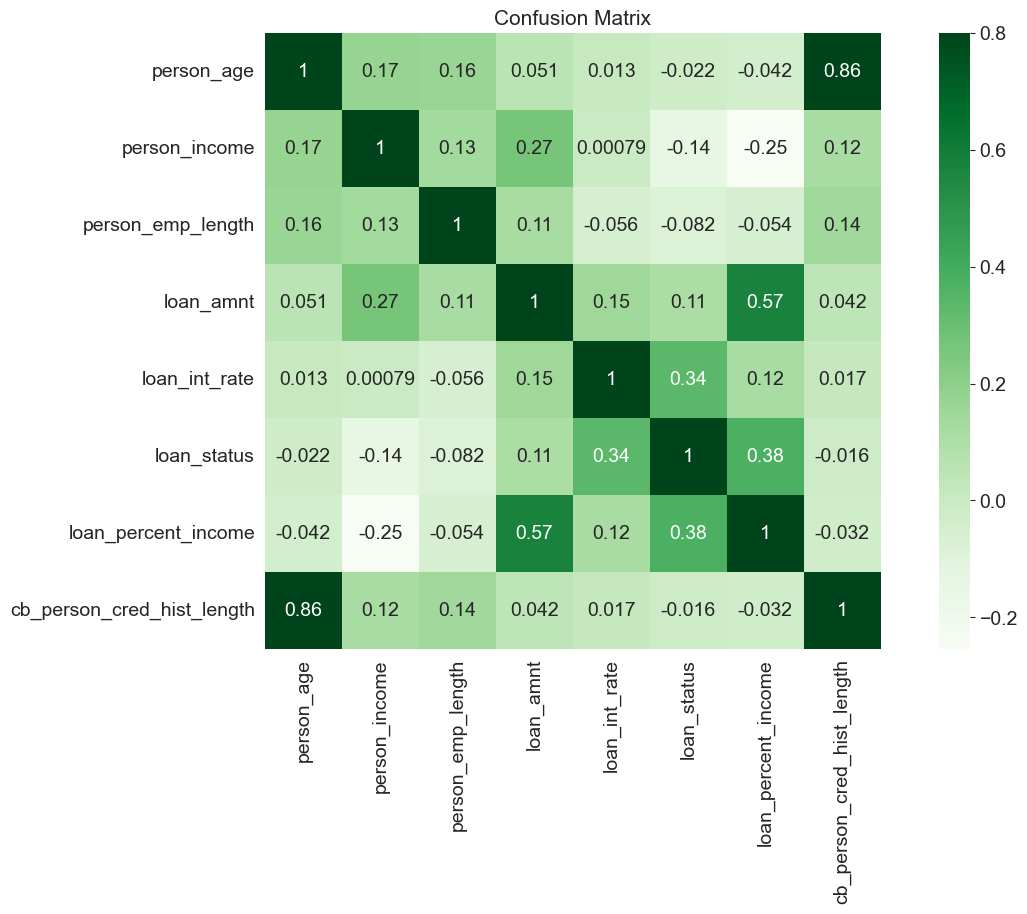

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(numeric_only=True), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Confusion Matrix',fontsize=15);

In [101]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')


In [102]:
# Display unique values for each feature 
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

,count
person_age,
23,3889
22,3633
24,3549
25,3037
26,2477
27,2138
28,1854
29,1687
30,1316


### 4. Univarient Analysis

In [103]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])




maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


In [104]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])


maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [105]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])


maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [106]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Most of the People taking a loan doesnt own their own house**


In [107]:
level_counts=data.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

**Observations: Loan Grade A and B comprises of 65.2% of total**

In [108]:
fig=px.histogram(data, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

**Observations:Loan Intent are equally almost distributed**

In [109]:
fig=px.histogram(data, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

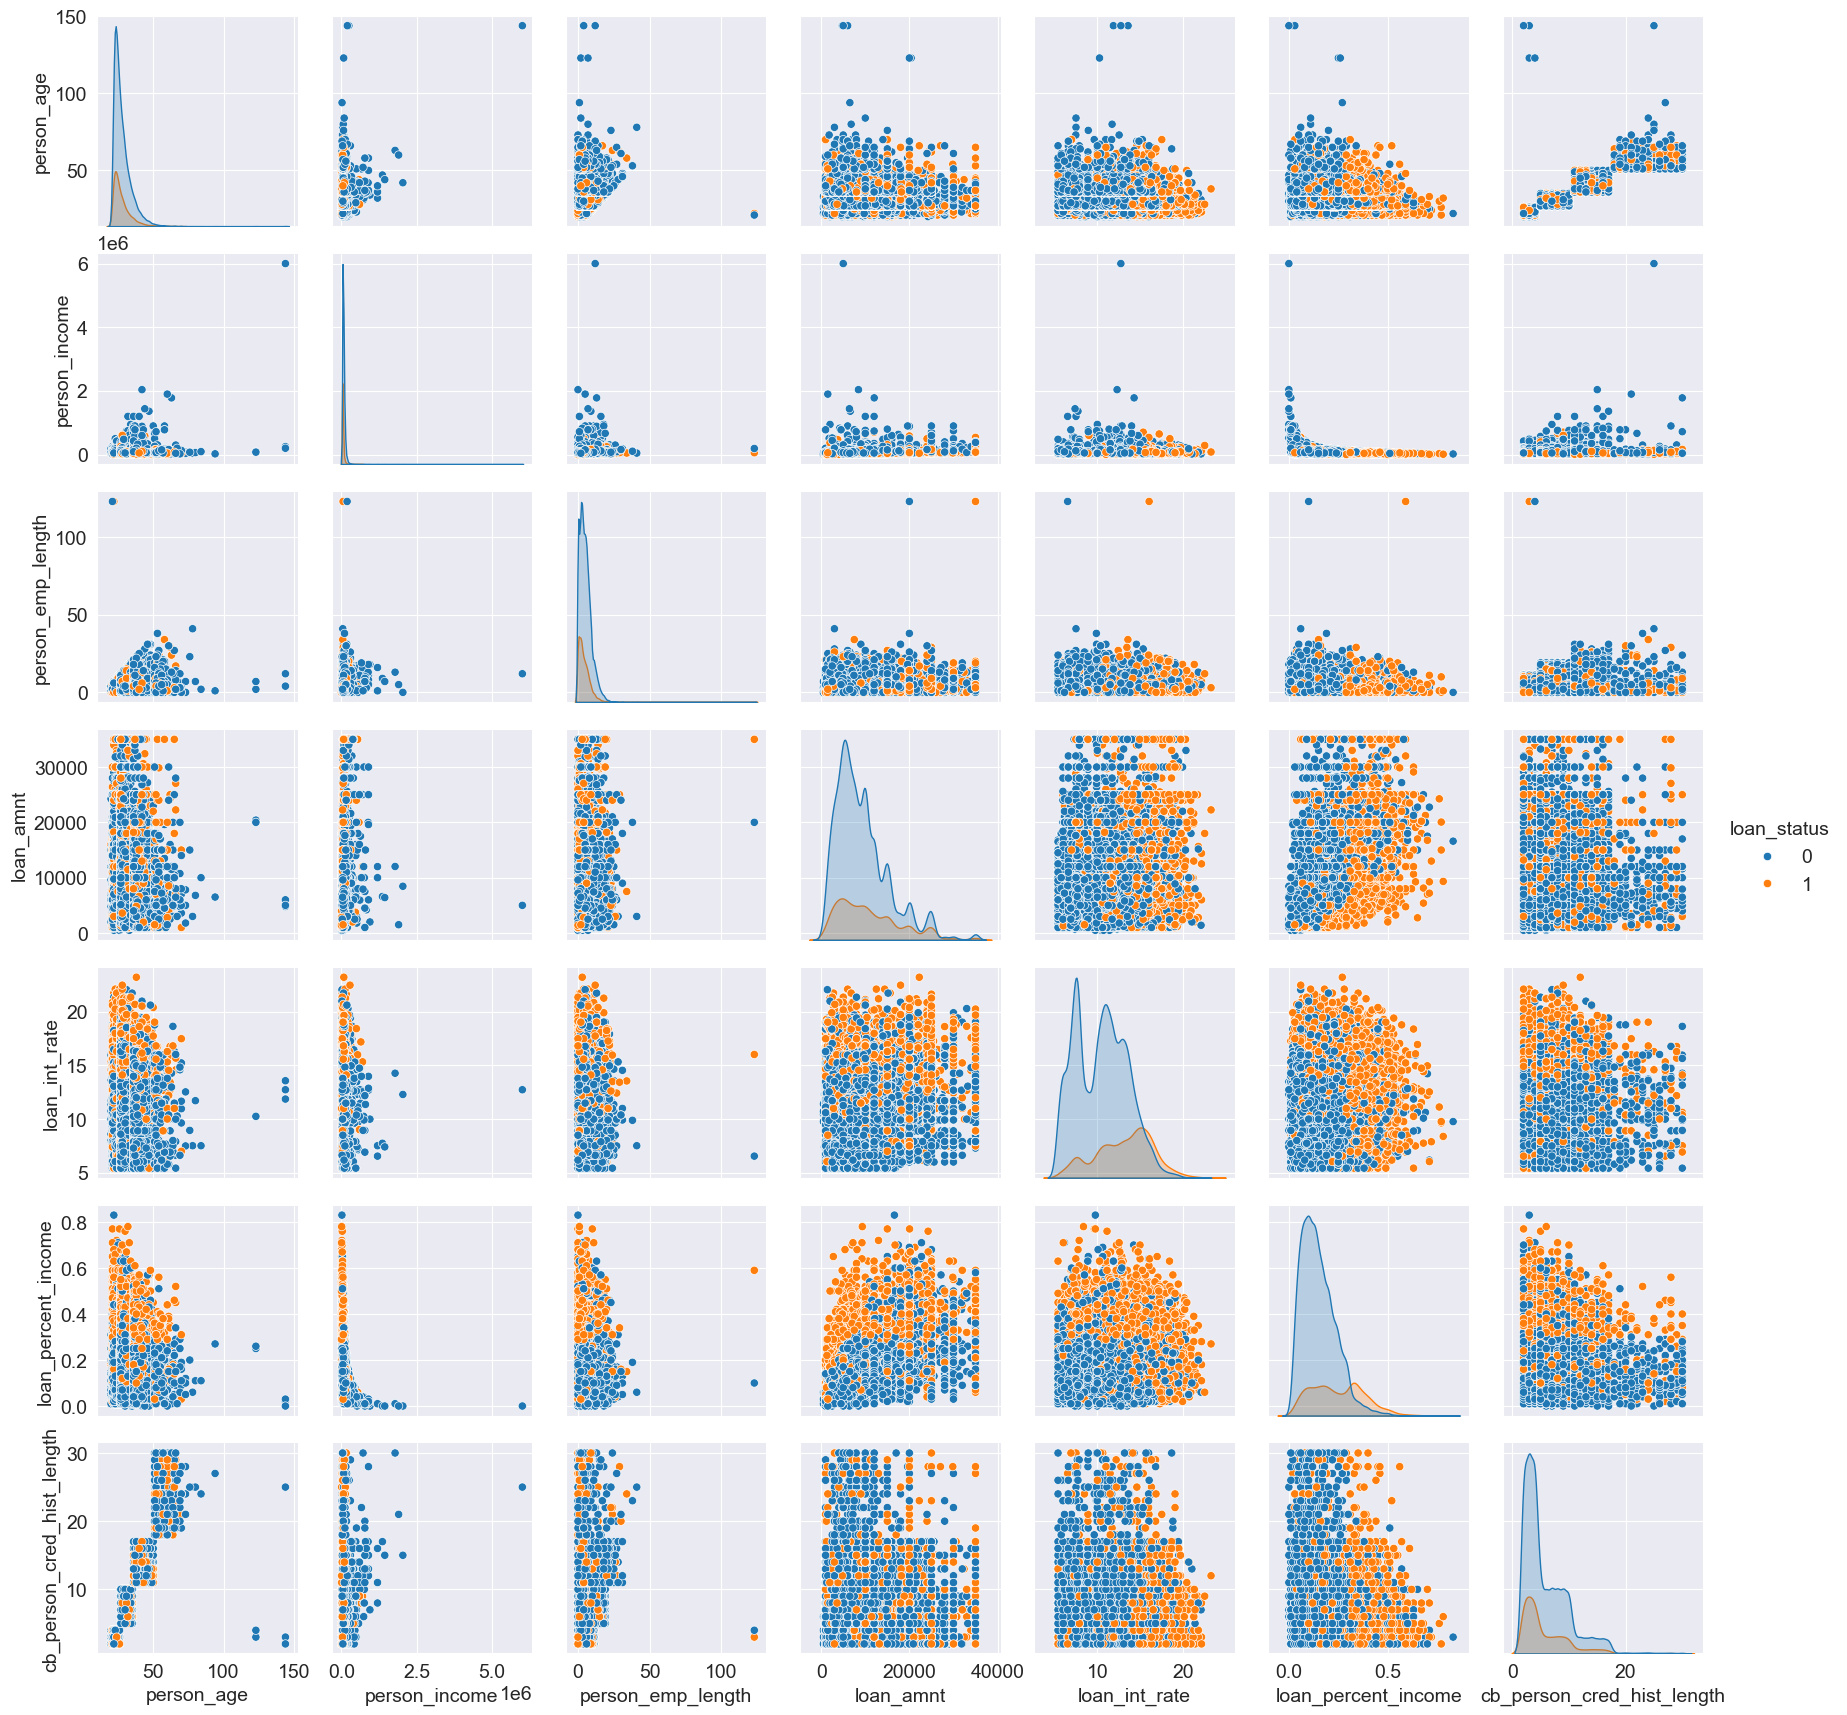

In [110]:
sns.pairplot(data,hue="loan_status")

### 5. Dealing with Outliers

In [111]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [112]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [113]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [114]:
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [115]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [116]:
data.reset_index(inplace = True)

<BarContainer object of 57 artists>

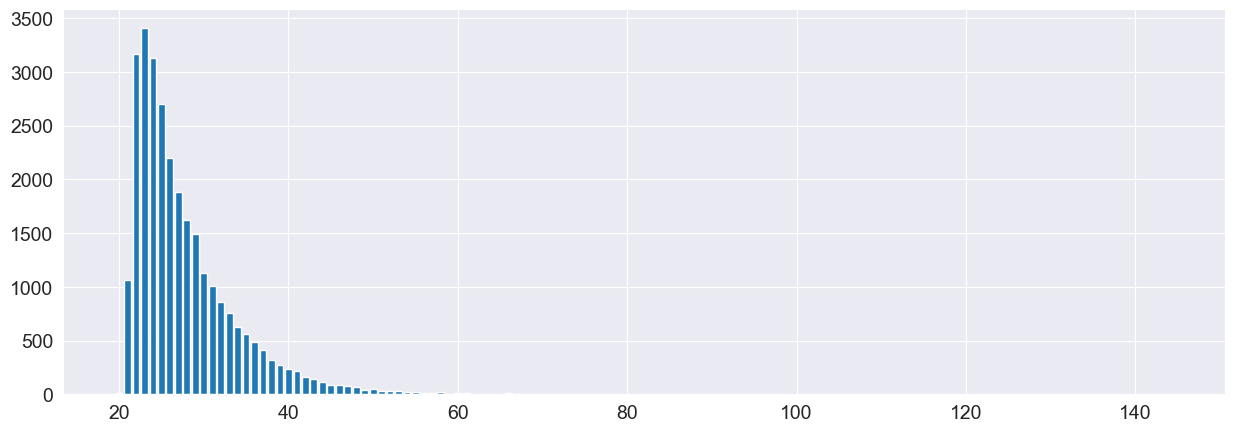

In [117]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [118]:
(data['person_age'].value_counts().values>90).sum()
# dropping rows that have age greater than 90

np.int64(25)

### 6. Feature Engineering

#### Person Age

In [119]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [120]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [121]:
data['age_group']

0        20-25
1        20-25
2        20-25
3        20-25
4        20-25
         ...  
28633    56-65
28634    46-55
28635    56-65
28636    46-55
28637    56-65
Name: age_group, Length: 28633, dtype: category
Categories (5, object): ['20-25' < '26-35' < '36-45' < '46-55' < '56-65']

In [122]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


####  Income Group

In [123]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [124]:
data['income_group']

0             middle
1                low
2                low
3             middle
4             middle
            ...     
28633         middle
28634           high
28635    high-middle
28636           high
28637     low-middle
Name: income_group, Length: 28633, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

In [125]:
data.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,middle
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle


#### Loan Amount

In [126]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [127]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
28633        medium
28634    very large
28635    very large
28636         large
28637        medium
Name: loan_amount_group, Length: 28633, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

#### Person Employment Period

In [128]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [129]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

#### Home Ownership Type

In [130]:
data['person_home_ownership'].value_counts()


person_home_ownership
RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64

In [131]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


#### New Ratio column Creation

In [132]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [133]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [134]:
raw_data = data.copy()

In [135]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [136]:
data = data.drop(drop_colums, axis=1)

In [137]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

### 7. Data Preprocessing


In [138]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


In [140]:
print(x_train.shape,x_test.shape)

(22904, 17) (5727, 17)


In [141]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [142]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group', 'loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [143]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [144]:
ohe.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [145]:
merge_ohe_col = ohe.get_feature_names_out(ohe_colums)

In [146]:
merge_ohe_col

array(['cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'income_group_high',
       'income_group_high-middle', 'income_group_low',
       'income_group_low-middle', 'income_group_middle',
       'age_group_20-25', 'age_group_26-35', 'age_group_36-45',
       'age_group_46-55', 'age_group_56-65', 'age_group_nan',
       'loan_amount_group_large', 'loan_amount_group_medium',
       'loan_amount_group_small', 'loan_amount_group_very large'],
      dtype=object)

In [147]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [148]:

X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)


In [149]:
X_new.head()
X_new.shape

(22904, 45)

In [150]:
X_new_test.head()
X_new_test.columns

Index(['cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'income_group_high',
       'income_group_high-middle', 'income_group_low',
       'income_group_low-middle', 'income_group_middle', 'age_group_20-25',
       'age_group_26-35', 'age_group_36-45', 'age_group_46-55',
       'age_group_56-65', 'age_group_nan', 'loan_amount_group_large',
       'loan_amount_group_medium', 'loan_amount_group_small',
       'loan_amount_group_very large', 'index', 'person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
  

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import joblib

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

# Save the fitted scaler
joblib.dump(scaler_normal, 'backend/app/models/scaler.pkl')
print("✓ Scaler saved to backend/app/models/scaler.pkl")

# Also save the column names and statistics for reference
scaler_stats = {}
for col in normal_col:
    if col in X_new.columns:
        scaler_stats[col] = {
            'mean': float(X_new[col].mean()),
            'std': float(X_new[col].std())
        }

import json
with open('backend/app/models/scaler_stats.json', 'w') as f:
    json.dump(scaler_stats, f, indent=2)
print("✓ Scaler statistics saved to backend/app/models/scaler_stats.json")


In [ ]:
# Save the scaler for later use in prediction service
import joblib

# Assuming you have your final preprocessed training data in X_new
# Create and fit the scaler on your training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols_to_scale = ['person_age', 'person_income', 'person_emp_length', 
                        'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length',
                        'loan_percent_income', 'loan_to_income_ratio', 
                        'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio']

# Fit scaler on training data
scaler.fit(X_new[numeric_cols_to_scale])

# Save the fitted scaler
joblib.dump(scaler, 'backend/app/models/scaler.pkl')
print("✓ Scaler saved to backend/app/models/scaler.pkl")

# Also save the column names and statistics for reference
scaler_stats = {}
for col in numeric_cols_to_scale:
    if col in X_new.columns:
        scaler_stats[col] = {
            'mean': float(X_new[col].mean()),
            'std': float(X_new[col].std())
        }

import json
with open('backend/app/models/scaler_stats.json', 'w') as f:
    json.dump(scaler_stats, f, indent=2)
print("✓ Scaler statistics saved to backend/app/models/scaler_stats.json")


In [152]:
X_new_test.head()

,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,person_home_ownership_MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


### 8. ML Classification Models</div>


In [153]:
# !pip install catboost
# !pip install lightgbm

In [154]:
# !pip install bayesian-optimization

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [156]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = lgb.LGBMClassifier()



In [157]:
# clf = {
#     'KN' : knc,
#     'xgb':xgb,
#     'cat':cat,
#     'lgb':lgb
# }

In [168]:
clf = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

### 9. MLflow Used for for Experiment tracking purpose

In [159]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, precision, recall, specificity

# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)

In [160]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

# Convert all column names to string type for scikit-learn compatibility
X_new.columns = X_new.columns.astype(str)
X_new_test.columns = X_new_test.columns.astype(str)

In [ ]:
import mlflow
import mlflow.lightgbm
import mlflow.sklearn
import mlflow.xgboost
import mlflow.catboost
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

classifiers_to_run = clf.copy()
# mlflow.set_tracking_uri("file:///content/mlruns")

mlflow.end_run()

mlflow.set_tracking_uri("file:///E:/BITS/Dissertation/Credit risk predictor/mlruns")
# E:\BITS\Dissertation\Credit risk predictor\mlruns

mlflow.set_experiment("Credit_Risk_Prediction_All_Classifiers_Comparison")

# --- Parent Run: Overall Model Comparison Pipeline ---
with mlflow.start_run(run_name="All_Classifiers_Comparison") as parent_run:
    mlflow.log_param("data_split_ratio", "80_20")
    mlflow.log_param("scaling_method", "StandardScaler")
    mlflow.log_param("encoding_method", "OneHotEncoder")
    mlflow.log_param("feature_engineering_steps", "age_group, income_group, loan_amount_group, loan_to_income_ratio, loan_to_emp_length_ratio, int_rate_to_loan_amt_ratio")

    print(f"Parent Run ID: {parent_run.info.run_id}")
    mlflow_run_id = parent_run.info.run_id
    # Iterate through each classifier in the 'classifiers_to_run' dictionary
    # This dictionary was created in a previous cell (e0f16ab7) by copying 'clf' and removing 'MultinomialNB'
    for name, clf_model_instance in classifiers_to_run.items():
        with mlflow.start_run(run_name=f"{name}_Training_and_Evaluation", nested=True) as child_run:
            print(f"    Child Run ID for {name}: {child_run.info.run_id}")
            mlflow.log_param("model_type", name)

           
            # if name == 'lgb':
            #     model_for_training = lgb.LGBMClassifier(random_state=12, **params_lgbm)
            # elif hasattr(clf_model_instance, 'get_params'):
            #     model_for_training = clf_model_instance
            # else:
            model_for_training = clf_model_instance

            # Train the model
            model_for_training.fit(X_new, y_train)

            # Evaluate the model
            accuracy, precision, recall, specificity = train_classifier(model_for_training, X_new, y_train, X_new_test, y_test)

            # Log metrics
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("specificity", specificity)

            # Log the model artifact based on its type
            if isinstance(model_for_training, LGBMClassifier):
                mlflow.lightgbm.log_model(
                    lgb_model=model_for_training,
                    artifact_path=f"{name}_model_artifact", 
                    registered_model_name=f"CreditRiskModel_{name}"
                )
            elif isinstance(model_for_training, XGBClassifier):
                model_for_training._estimator_type = 'classifier'
                mlflow.xgboost.log_model(
                    xgb_model=model_for_training,
                    artifact_path=f"{name}_model_artifact", 
                    registered_model_name=f"CreditRiskModel_{name}"
                )
            elif isinstance(model_for_training, CatBoostClassifier):
                mlflow.catboost.log_model(
                    cb_model=model_for_training,
                    artifact_path=f"{name}_model_artifact", 
                )
            else: # Use mlflow.sklearn for all other sklearn-compatible models
                mlflow.sklearn.log_model(
                    sk_model=model_for_training,
                    artifact_path=f"{name}_model_artifact", 
                    registered_model_name=f"CreditRiskModel_{name}"
                )
                # print("For ",name)
                print("     Accuracy - ",accuracy)
                print("     Precision - ",precision)
                print("     Recall - ",recall)
                print("     Specificity - ",specificity)                
            print(f"    {name} Training and Evaluation Run completed.")
            print()

print("Overall Model Comparison Pipeline completed. Check MLflow UI for hierarchical view and detailed metrics for each classifier.")

Parent Run ID: 7ec775ad11704619a7028289ed874cb3
    Child Run ID for SVC: 639375fed7384eb2b6c32b6fe3ccc876


Registered model 'CreditRiskModel_SVC' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_SVC'.


     Accuracy -  0.7827833071416099
     Precision -  0.0
     Recall -  0.0
     Specificity -  1.0
    SVC Training and Evaluation Run completed.

    Child Run ID for KN: fbb0530a780f4c508b0480d6064ac098


Registered model 'CreditRiskModel_KN' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_KN'.


     Accuracy -  0.7943076654443862
     Precision -  0.5565068493150684
     Recall -  0.2612540192926045
     Specificity -  0.9422261878206558
    KN Training and Evaluation Run completed.

    Child Run ID for DT: bce55d137de745c69cfd1d0be8cf2e8d


Registered model 'CreditRiskModel_DT' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_DT'.


     Accuracy -  0.8885978697398289
     Precision -  0.737460815047022
     Recall -  0.7564308681672026
     Specificity -  0.9252732545170644
    DT Training and Evaluation Run completed.

    Child Run ID for LR: 041bac964d2b4783a462d881aee04212


Registered model 'CreditRiskModel_LR' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_LR'.


     Accuracy -  0.8636284267504801
     Precision -  0.7508125677139762
     Recall -  0.5570739549839229
     Specificity -  0.9486950702654472
    LR Training and Evaluation Run completed.

    Child Run ID for RF: 782aa72b03f94bac9ae1e45bff62265e


Registered model 'CreditRiskModel_RF' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_RF'.


     Accuracy -  0.9312030731622141
     Precision -  0.9701327433628318
     Recall -  0.704983922829582
     Specificity -  0.9939772473789873
    RF Training and Evaluation Run completed.

    Child Run ID for AdaBoost: 0a69c17ebc7a4b1faf46643db7cd98cb


Registered model 'CreditRiskModel_AdaBoost' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_AdaBoost'.


     Accuracy -  0.8784704033525406
     Precision -  0.7644787644787645
     Recall -  0.6366559485530546
     Specificity -  0.9455721614989963
    AdaBoost Training and Evaluation Run completed.

    Child Run ID for BgC: 215e511bd1a24d4393ea6eee8e87dd4a


Registered model 'CreditRiskModel_BgC' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_BgC'.


     Accuracy -  0.9329491880565741
     Precision -  0.9663774403470716
     Recall -  0.7162379421221865
     Specificity -  0.9930849877314298
    BgC Training and Evaluation Run completed.

    Child Run ID for ETC: fd73d323ac624f9e8df5faa4d687be5a


Registered model 'CreditRiskModel_ETC' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_ETC'.


     Accuracy -  0.9257901169896979
     Precision -  0.9379679144385027
     Recall -  0.704983922829582
     Specificity -  0.9870622351104171
    ETC Training and Evaluation Run completed.

    Child Run ID for GBDT: c6db22d49d31438394a48e31c603d480


Registered model 'CreditRiskModel_GBDT' already exists. Creating a new version of this model...
Created version '6' of model 'CreditRiskModel_GBDT'.


     Accuracy -  0.92788545486293
     Precision -  0.9560922063666301
     Recall -  0.7001607717041801
     Specificity -  0.9910774035244256
    GBDT Training and Evaluation Run completed.

    Child Run ID for xgb: 487a8dd5cc99495ea530f4e4810d7629


2025/12/15 23:06:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\Admin\AppData\Local\Temp\tmp8qfsv11d\model, flavor: xgboost). Fall back to return ['xgboost==3.1.2']. Set logging level to DEBUG to see the full traceback. 
Registered model 'CreditRiskModel_xgb' already exists. Creating a new version of this model...


    xgb Training and Evaluation Run completed.

Overall Model Comparison Pipeline completed. Check MLflow UI for hierarchical view and detailed metrics for each classifier.


Created version '5' of model 'CreditRiskModel_xgb'.


In [175]:
import xgboost
print(xgboost.__version__)

3.1.2


In the context of loan default prediction, two key factors come into play: the potential financial impact of missed loan defaults and the risk of denying loans to trustworthy applicants.

1- Recall (Sensitivity): Recall measures how well the model identifies actual loan defaults. For lenders, missing a loan that eventually defaults can lead to significant financial losses. Thus, achieving a high Recall is essential because it ensures that most potential default cases are detected, minimizing the risk of financial setbacks.

2- Specificity: Specificity gauges the model's accuracy in identifying loans that won't default. Misclassifying a reliable borrower as a potential defaulter (false positive) can result in lost business opportunities. By emphasizing high Specificity, the model aims to avoid misclassifications that could deny loans to credible applicants.

3- Precision: Precision is a key metric as it evaluates the accuracy of positive predictions. Lenders need to avoid false positives (incorrectly predicting defaults) to prevent unwarranted actions. Maintaining high Precision ensures that when the model predicts a default, it's highly likely to be accurate. This protects the lender from unnecessary costs and safeguards borrower relationships.

### 10. Hyperparameter Tuning

In [176]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {
        'objective': 'binary',
        'verbose': -1,  # Suppress LightGBM output
        'force_col_wise': True,  # Remove the overhead warning

    }
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree

    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

|   iter    |  target   | num_le... | max_depth | learni... | min_ch... | subsample | colsam... |
-------------------------------------------------------------------------------------------------
| 1         | 0.7119839 | 0.8671115 | 3.0266796 | 0.1969362 | 0.0627970 | 0.9005717 | 0.7690838 |
| 2         | 0.7496977 | 0.7791879 | 10.820988 | 0.1513229 | 0.0606329 | 0.9585018 | 0.7179779 |
| 3         | 0.7535316 | 0.7802616 | 8.2913097 | 0.1572073 | 0.0659374 | 0.8159645 | 0.9684632 |
| 4         | 0.7668475 | 0.5       | 15.0      | 0.3       | 1e-06     | 0.5       | 1.0       |
| 5         | 0.1208166 | 0.9       | 13.541565 | 0.005     | 0.1       | 1.0       | 0.5       |
| 6         | 0.7559538 | 0.7648464 | 13.617115 | 0.2044040 | 0.0070143 | 0.5019697 | 0.6519093 |
| 7         | 0.6932290 | 0.7627082 | 5.7299300 | 0.0289016 | 0.0232690 | 0.9752771 | 0.7166315 |
| 8         | 0.7353791 | 0.5413901 | 6.4293006 | 0.1562547 | 0.0542876 | 0.6762629 | 0.5813058 |
| 9         | 0.7256

In [ ]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])


with mlflow.start_run(run_id=mlflow_run_id):
    mlflow.log_params(params_lgbm)
params_lgbm

{'num_leaves': 102,
 'max_depth': 7,
 'learning_rate': np.float64(0.2681333406738138),
 'min_child_weight': np.float64(0.03214509288020251),
 'subsample': np.float64(0.5833811949408516),
 'colsample_bytree': np.float64(0.9052523026324037)}

In [ ]:
# mlflow.end_run()

### 11. Training Final Model


In [178]:
from sklearn.ensemble import VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier

knn = KNeighborsClassifier()
# cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

For ensemble
Accuracy -  0.8995983935742972
Precision -  0.9678321678321679
Recall -  0.5562700964630225
Specificity -  0.9948695070265448


#### 12. Feature Importance

In [179]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

loan_to_income_ratio              0.233806
loan_int_rate                     0.154117
person_home_ownership_RENT        0.124552
person_income                     0.101833
index                             0.046164
person_emp_length                 0.037113
int_rate_to_loan_amt_ratio        0.031183
loan_intent_MEDICAL               0.030825
loan_to_emp_length_ratio          0.030051
loan_intent_DEBTCONSOLIDATION     0.027973
loan_grade_C                      0.027677
person_age                        0.026357
loan_grade_D                      0.018805
loan_percent_income               0.018279
cb_person_cred_hist_length        0.014998
loan_amnt                         0.013717
loan_intent_HOMEIMPROVEMENT       0.010606
person_home_ownership_OWN         0.010557
person_home_ownership_MORTGAGE    0.004831
loan_intent_EDUCATION             0.004414
loan_intent_PERSONAL              0.004134
loan_intent_VENTURE               0.003490
loan_grade_G                      0.003093
cb_person_d

#### 10. Extra

In [ ]:
# Install MLflow if not already installed
# !pip install mlflow

In [ ]:
import mlflow
import mlflow.lightgbm
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Set the MLflow tracking URI (you can use a local directory or a remote server)
# For local tracking, it will create an 'mlruns' folder in your current directory.
mlflow.set_tracking_uri("file:///content/mlruns")

# Set an experiment name
mlflow.set_experiment("Credit_Risk_Prediction_LightGBM")

# Start an MLflow run
with mlflow.start_run(run_name="LightGBM_Bayesian_Optimized"):
    # Log hyperparameters
    mlflow.log_params(params_lgbm)

    # Train the LightGBM model with the best hyperparameters
    final_lgbm_model = lgb.LGBMClassifier(random_state=12, **params_lgbm)
    final_lgbm_model.fit(X_new, y_train)

    # Evaluate the model using the previously defined function
    current_accuracy, current_precision, current_recall, current_specificity = train_classifier(final_lgbm_model, X_new, y_train, X_new_test, y_test)

    # Log metrics
    mlflow.log_metric("accuracy", current_accuracy)
    mlflow.log_metric("precision", current_precision)
    mlflow.log_metric("recall", current_recall)
    mlflow.log_metric("specificity", current_specificity)

    # Log the LightGBM model
    # This will save the model, its dependencies, and metadata
    mlflow.lightgbm.log_model(
        lgb_model=final_lgbm_model,
        artifact_path="lightgbm_model",
        registered_model_name="CreditRiskLightGBMModel"
    )

    print("MLflow Run completed. You can view the run details by navigating to the 'mlruns' directory or by running 'mlflow ui' in your terminal.")
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {current_precision}")
    print(f"Recall: {current_recall}")
    print(f"Specificity: {current_specificity}")

2025/12/12 16:37:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


MLflow Run completed. You can view the run details by navigating to the 'mlruns' directory or by running 'mlflow ui' in your terminal.
Accuracy: 0.9432512659332984
Precision: 0.95995995995996
Recall: 0.7709003215434084
Specificity: 0.9910774035244256


Registered model 'CreditRiskLightGBMModel' already exists. Creating a new version of this model...
Created version '3' of model 'CreditRiskLightGBMModel'.


In [ ]:
raw_data.head()